# Plot drone

## Loading modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sim_dir =  "/root/dynamo/output/2023_01_02_19_05_53_drone_simulation_output"
filename = "sim_out.csv"
filepath = os.path.join(sim_dir, filename)
linearized_inputs = {
    'z': 'f',
    'phi': 'm_x',
    'theta': 'm_y',
    'psi': 'm_z'
}

var_labels = {
    'x': 'x', 'y': 'y', 'z':'z', 'theta': '\\theta', 'phi': '\\phi', 'psi': '\\psi',
    'f': 'f', 'm_x': 'm_x', 'm_y': 'm_y', 'm_z': 'm_z'
}
output_dir = sim_dir

## Functions

In [3]:
def time_plot(variables, sim_out, title:str=None, filename:str=None, xlim=None, ylim=None):
    fig, axes = plt.subplots(len(variables),1,figsize=(19.20,10.80))
    for i, zipped in enumerate(zip(axes, variables)):
        lines = list()
        ax, var = zipped
        ax.grid()
        base_name = var.replace('d', '')
        base_label = var.replace(base_name, var_labels[base_name])
        ylabel = f'${base_label}$'
        lines += ax.plot(sim_out['t'], sim_out[var], label=f'${base_label}$', color='C0')
        ref_name = f'ref_{var}'
        if ref_name in sim_out.columns:
            r_label = f'$r_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[ref_name], label=r_label, linestyle='--', color='k')
            ylabel += f', {r_label}'
        
        error_name = f'e_{var}'
        if error_name in sim_out.columns:
            error_label = f'$e_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[error_name], label=error_label, linestyle='--', color='C1')
            ylabel += f', {error_label}'

        input_name = f'u_{var}'
        if input_name in sim_out.columns:
            input_label = f'$u_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C2')
            # ylabel += f', ${input_name}$' if var == 'z' else f', $u_{{\\{var}}}$'
            ylabel += f', {input_label}'
        
        if var in linearized_inputs.keys():
            twinx = ax.twinx()
            input_name = linearized_inputs[var]
            input_label = f'${var_labels[input_name]}$'
            lines += twinx.plot(sim_out['t'], sim_out[input_name], label=input_label, linestyle='--', color='C3')
            twinx.set_ylabel(input_label)
            twinx.set(xlim=xlim, ylim=ylim)
        
        labels = [l.get_label() for l in lines]  
        ax.legend(lines, labels)
        
        if i < len(variables)-1:
            ax.set(xticklabels=[], ylabel=ylabel, xlim=xlim, ylim=ylim)
        else:
            ax.set(ylabel=ylabel, xlabel='Time (seconds)', xlim=xlim, ylim=ylim)
    
    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    
    return fig, axes

def state_space_plot(x, y, sim_out, title:str=None, filename:str=None):
    fig, ax = plt.subplots(1,1,figsize=(19.20,10.80))
    ax.grid()
    ax.plot(sim_out[x], sim_out[y])
    ax.set(xlabel=x, ylabel=y)

    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    return fig, ax

## Loading data

In [4]:
sim_out = pd.read_csv(filepath, index_col=0, dtype=float)
sim_out

,phi,dphi,theta,dtheta,psi,dpsi,x,dx,y,dy,...,ddphi,ddtheta,ddpsi,ddx,ddy,ddz,f1,f2,f3,f4
0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.200000,0.200000,0.200000,0.000000e+00,0.000000e+00,0.200000,1.080000e+01,4.440892e-17,-1.000000e+01,1.320000e+00
1.0,9.999967e-10,0.000020,9.999967e-10,0.000020,9.999967e-10,0.000020,8.499982e-18,3.399991e-13,-8.499982e-18,-3.399991e-13,...,0.199998,0.199998,0.199998,1.019996e-08,-1.019996e-08,0.199998,1.079999e+01,4.440848e-17,-1.000000e+01,1.319997e+00
2.0,1.209956e-07,0.000220,1.209956e-07,0.000220,1.209956e-07,0.000220,1.244456e-13,4.525269e-10,-1.244456e-13,-4.525268e-10,...,0.199978,0.199978,0.199978,1.234152e-06,-1.234152e-06,0.199978,1.079991e+01,4.440403e-17,-1.000000e+01,1.319965e+00
3.0,1.231642e-05,0.002219,1.231642e-05,0.002219,1.231642e-05,0.002219,1.290062e-09,4.648607e-07,-1.290049e-09,-4.648539e-07,...,0.199776,0.199776,0.199776,1.256262e-04,-1.256231e-04,0.199776,1.079910e+01,4.435911e-17,-1.000000e+01,1.319641e+00
4.0,1.229510e-03,0.022088,1.229510e-03,0.022088,1.229510e-03,0.022088,1.292484e-05,4.651636e-04,-1.291208e-05,-4.644777e-04,...,0.197545,0.197545,0.197545,1.255339e-02,-1.252257e-02,0.197545,1.079020e+01,4.386387e-17,-1.000002e+01,1.316074e+00
5.0,2.108068e-02,0.089939,2.108068e-02,0.089939,2.108068e-02,0.089939,3.911595e-03,3.378881e-02,-3.846051e-03,-3.294627e-02,...,0.186790,0.186790,0.186790,2.192568e-01,-2.102490e-01,0.186790,1.075169e+01,4.147570e-17,-1.000453e+01,1.299317e+00
6.0,9.318707e-02,0.182293,9.318707e-02,0.182293,9.318707e-02,0.182293,8.211638e-02,3.349690e-01,-7.622048e-02,-2.998279e-01,...,0.163133,0.163133,0.163133,1.034471e+00,-8.614403e-01,0.163133,1.074130e+01,3.622286e-17,-1.008877e+01,1.269890e+00
7.0,2.980843e-01,0.298275,2.980843e-01,0.298275,2.980843e-01,0.298275,1.002650e+00,2.259528e+00,-7.896658e-01,-1.588444e+00,...,0.110556,0.110556,0.110556,3.923754e+00,-2.194049e+00,0.110556,1.139661e+01,2.454828e-17,-1.095439e+01,1.272328e+00
8.0,7.512885e-01,0.378596,7.512885e-01,0.378596,7.512885e-01,0.378596,9.617996e+00,1.345130e+01,-5.083473e+00,-5.199114e+00,...,0.011883,0.011883,0.011883,1.556796e+01,-2.968236e+00,0.011883,1.878157e+01,2.638499e-18,-1.873404e+01,1.892416e+00
9.0,1.134127e+00,0.351638,1.134127e+00,0.351638,1.134127e+00,0.351638,3.604232e+01,4.407627e+01,-1.189328e+01,-7.846664e+00,...,-0.061989,-0.061989,-0.061989,5.462910e+01,-1.998060e+00,-0.061989,5.537566e+01,-1.376436e-17,-5.562362e+01,5.463179e+00


## Drone positions over time

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot: ylabel='$x$, $r_{x}$, $e_{x}$, $u_{x}$'>,
        <AxesSubplot: ylabel='$y$, $r_{y}$, $e_{y}$, $u_{y}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$z$, $r_{z}$, $e_{z}$, $u_{z}$'>],
       dtype=object))

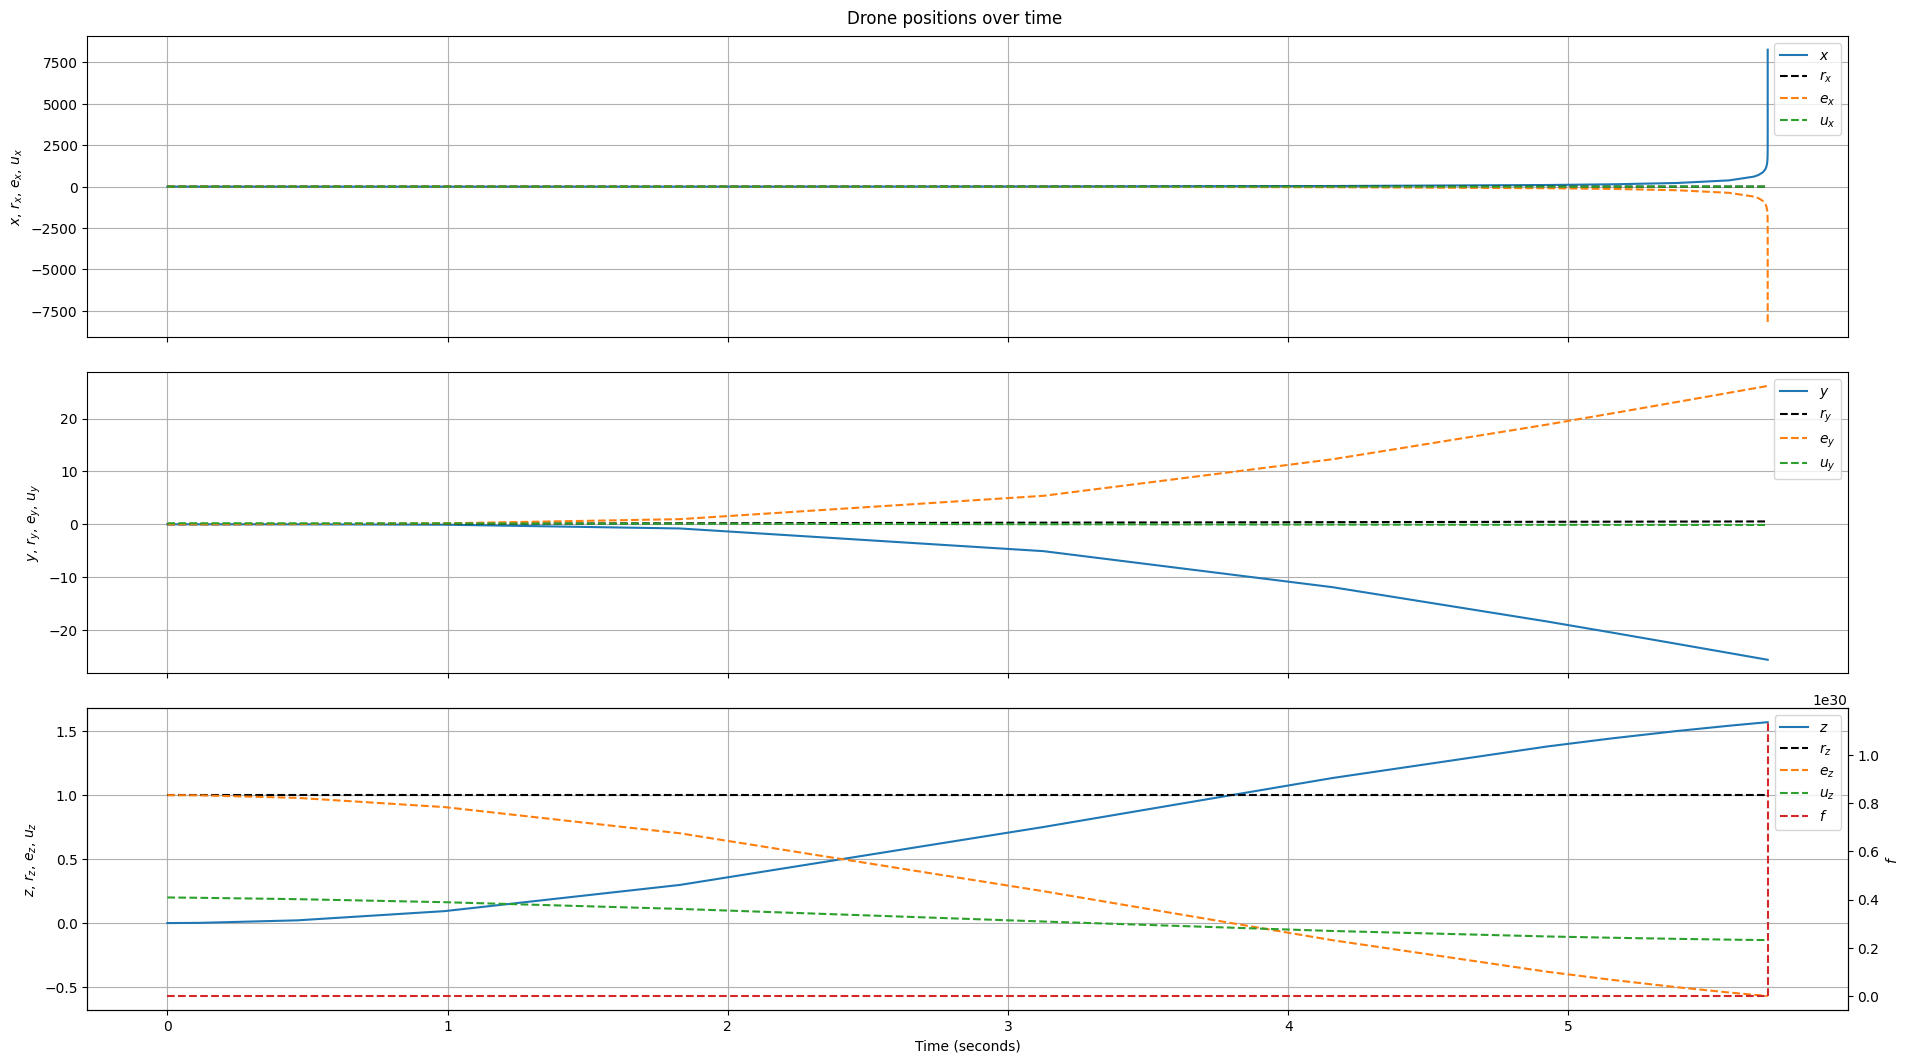

In [5]:
time_plot(['x', 'y', 'z'], sim_out, title='Drone positions over time',
    filename=os.path.join(output_dir, 'positions_over_time.png'))

## Drone directions over time

(<Figure size 1920x1080 with 6 Axes>,
 array([<AxesSubplot: ylabel='$\\phi$, $r_{\\phi}$, $e_{\\phi}$, $u_{\\phi}$'>,
        <AxesSubplot: ylabel='$\\theta$, $r_{\\theta}$, $e_{\\theta}$, $u_{\\theta}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$\\psi$, $r_{\\psi}$, $e_{\\psi}$, $u_{\\psi}$'>],
       dtype=object))

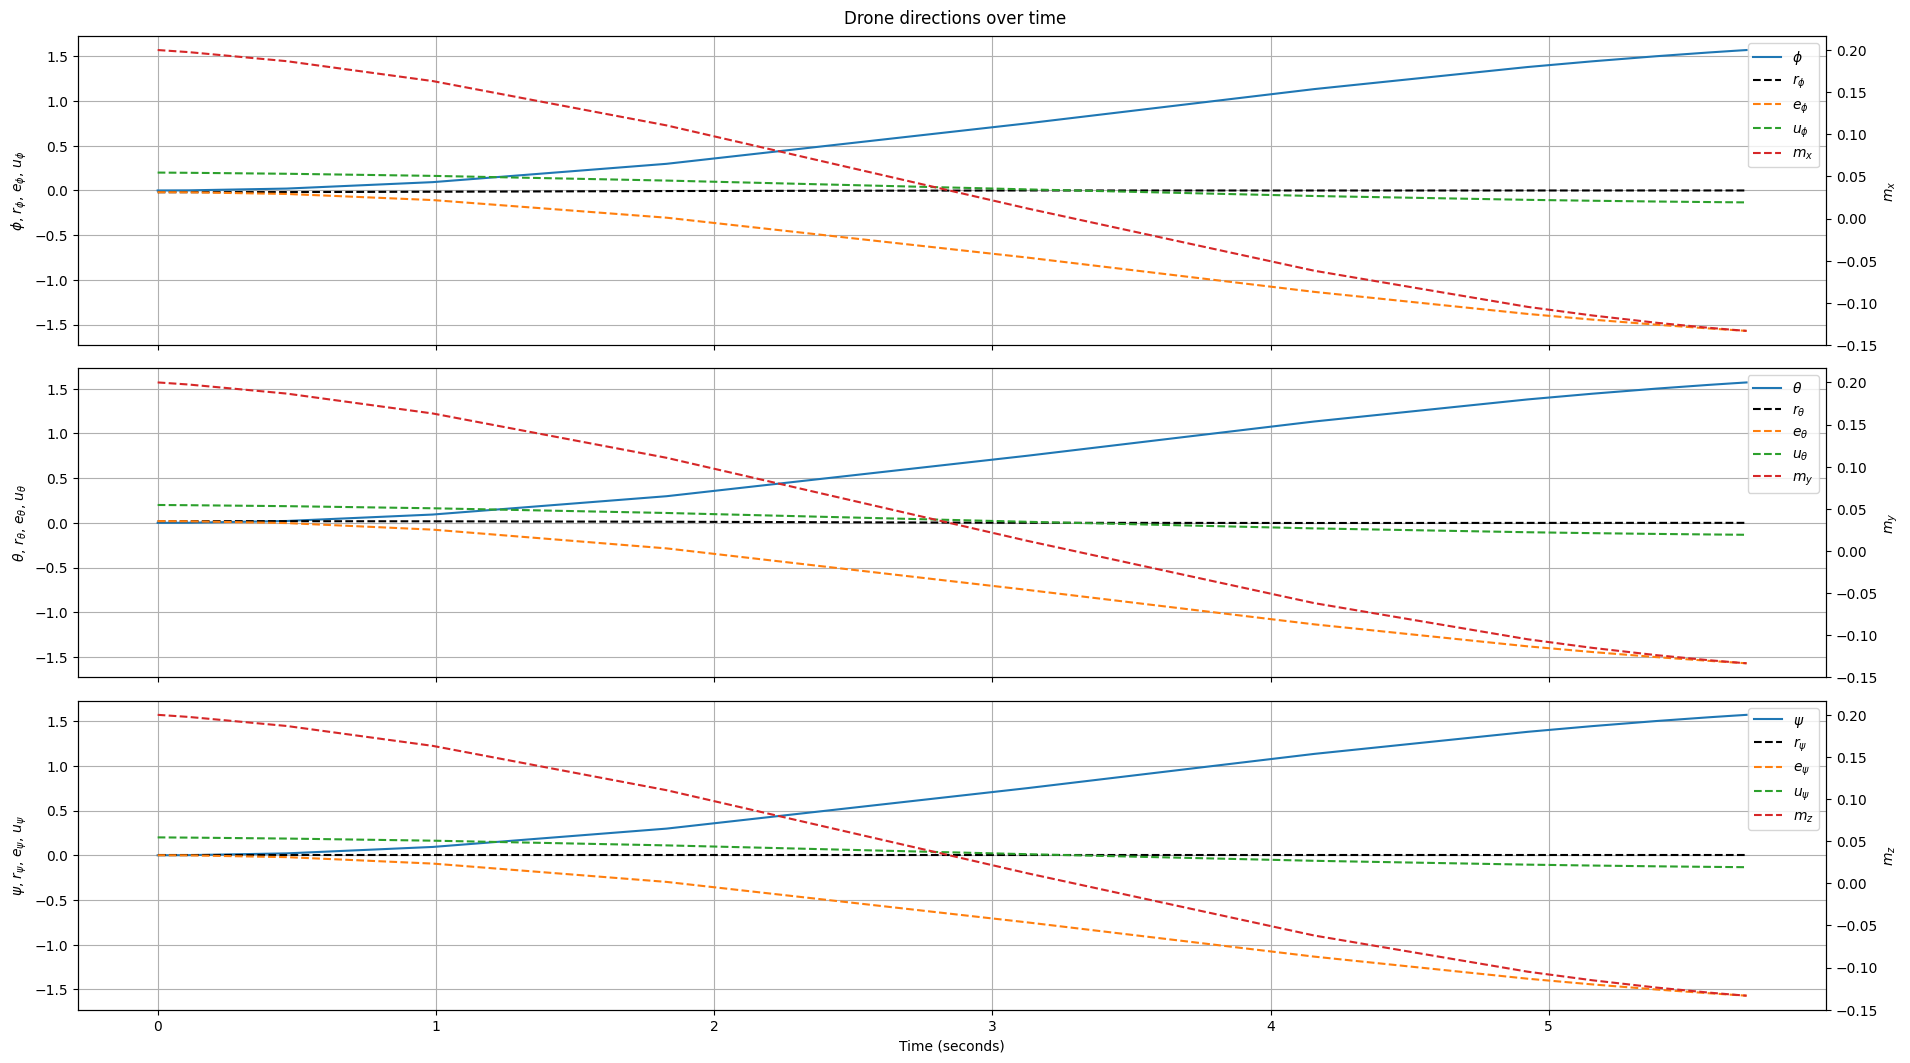

In [6]:
time_plot(['phi', 'theta', 'psi'], sim_out, title='Drone directions over time',
    filename=os.path.join(output_dir, 'directions_over_time.png'))

## Drone diff positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot: ylabel='$dx$, $e_{dx}$'>,
        <AxesSubplot: ylabel='$dy$, $e_{dy}$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$dz$'>],
       dtype=object))

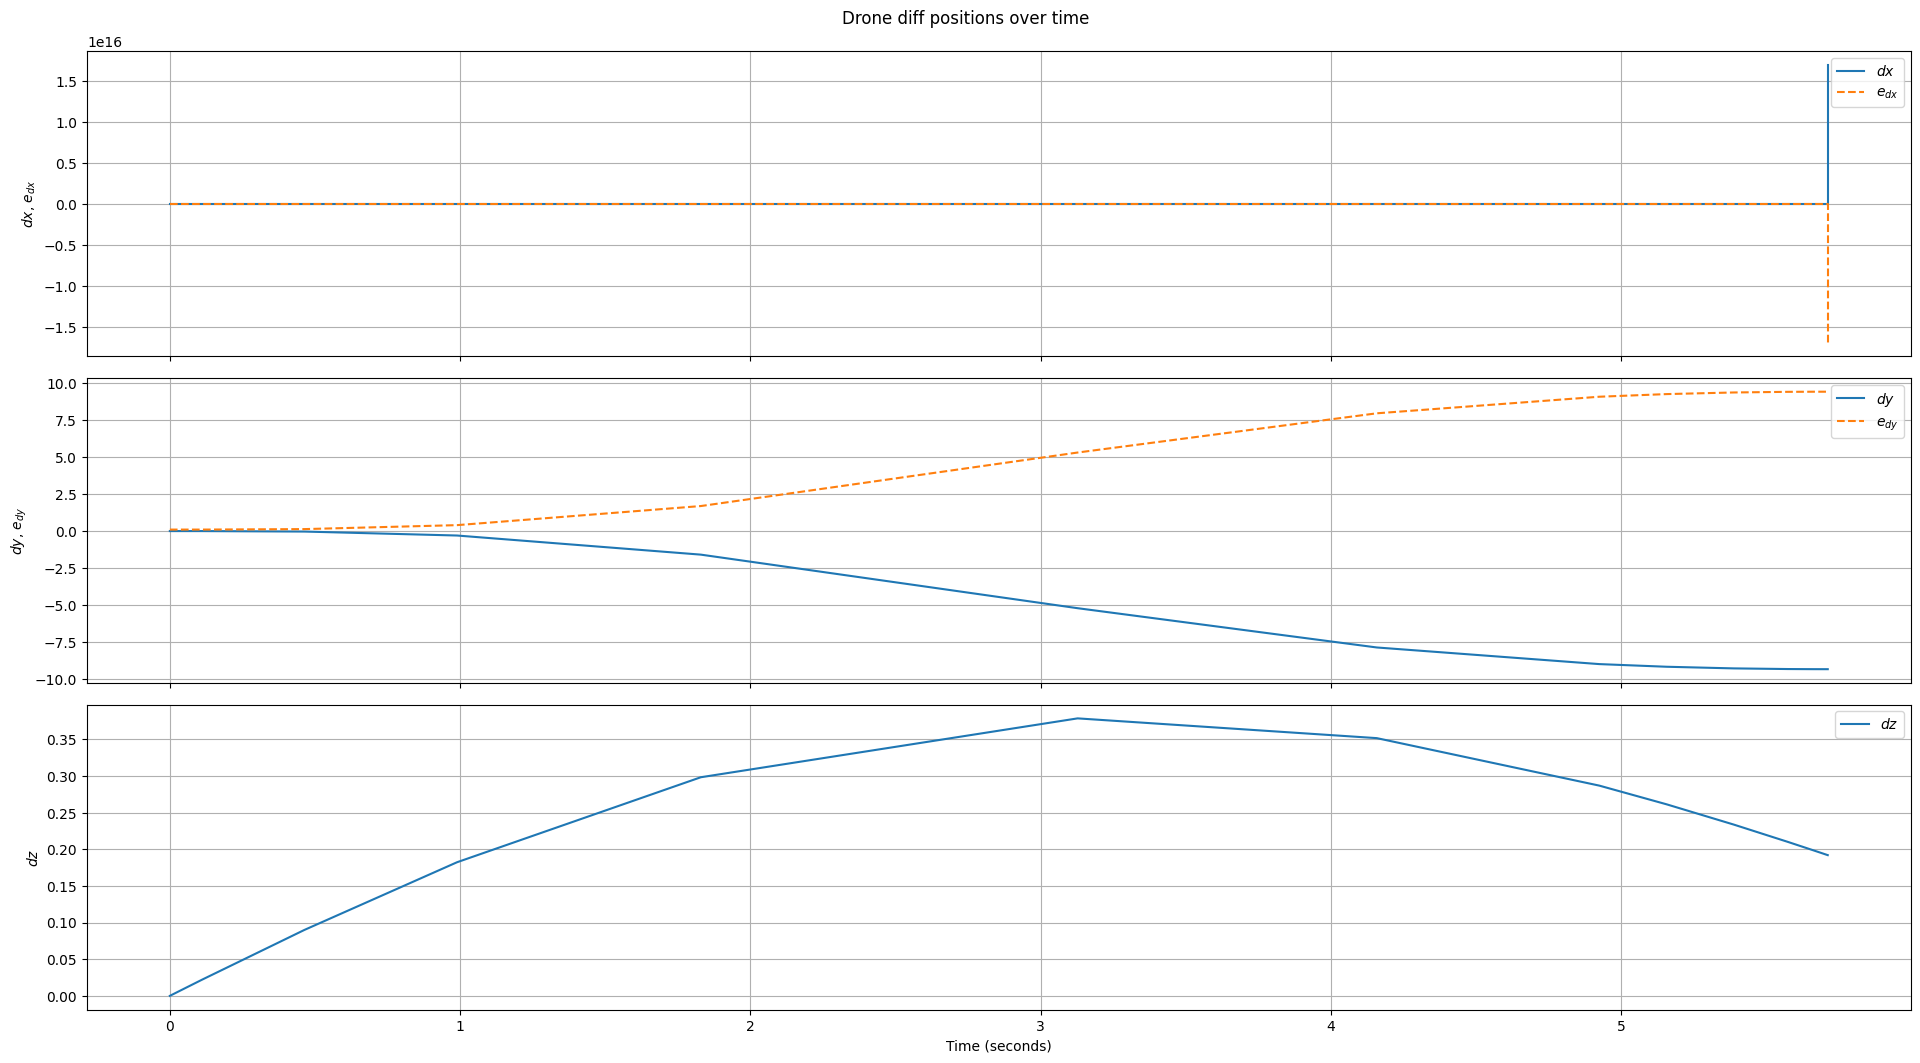

In [7]:
time_plot(['dx', 'dy', 'dz'], sim_out, title='Drone diff positions over time',
    filename=os.path.join(output_dir, 'diff_positions_over_time.png'))

## Drone diff directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot: ylabel='$d\\phi$'>,
        <AxesSubplot: ylabel='$d\\theta$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$d\\psi$'>],
       dtype=object))

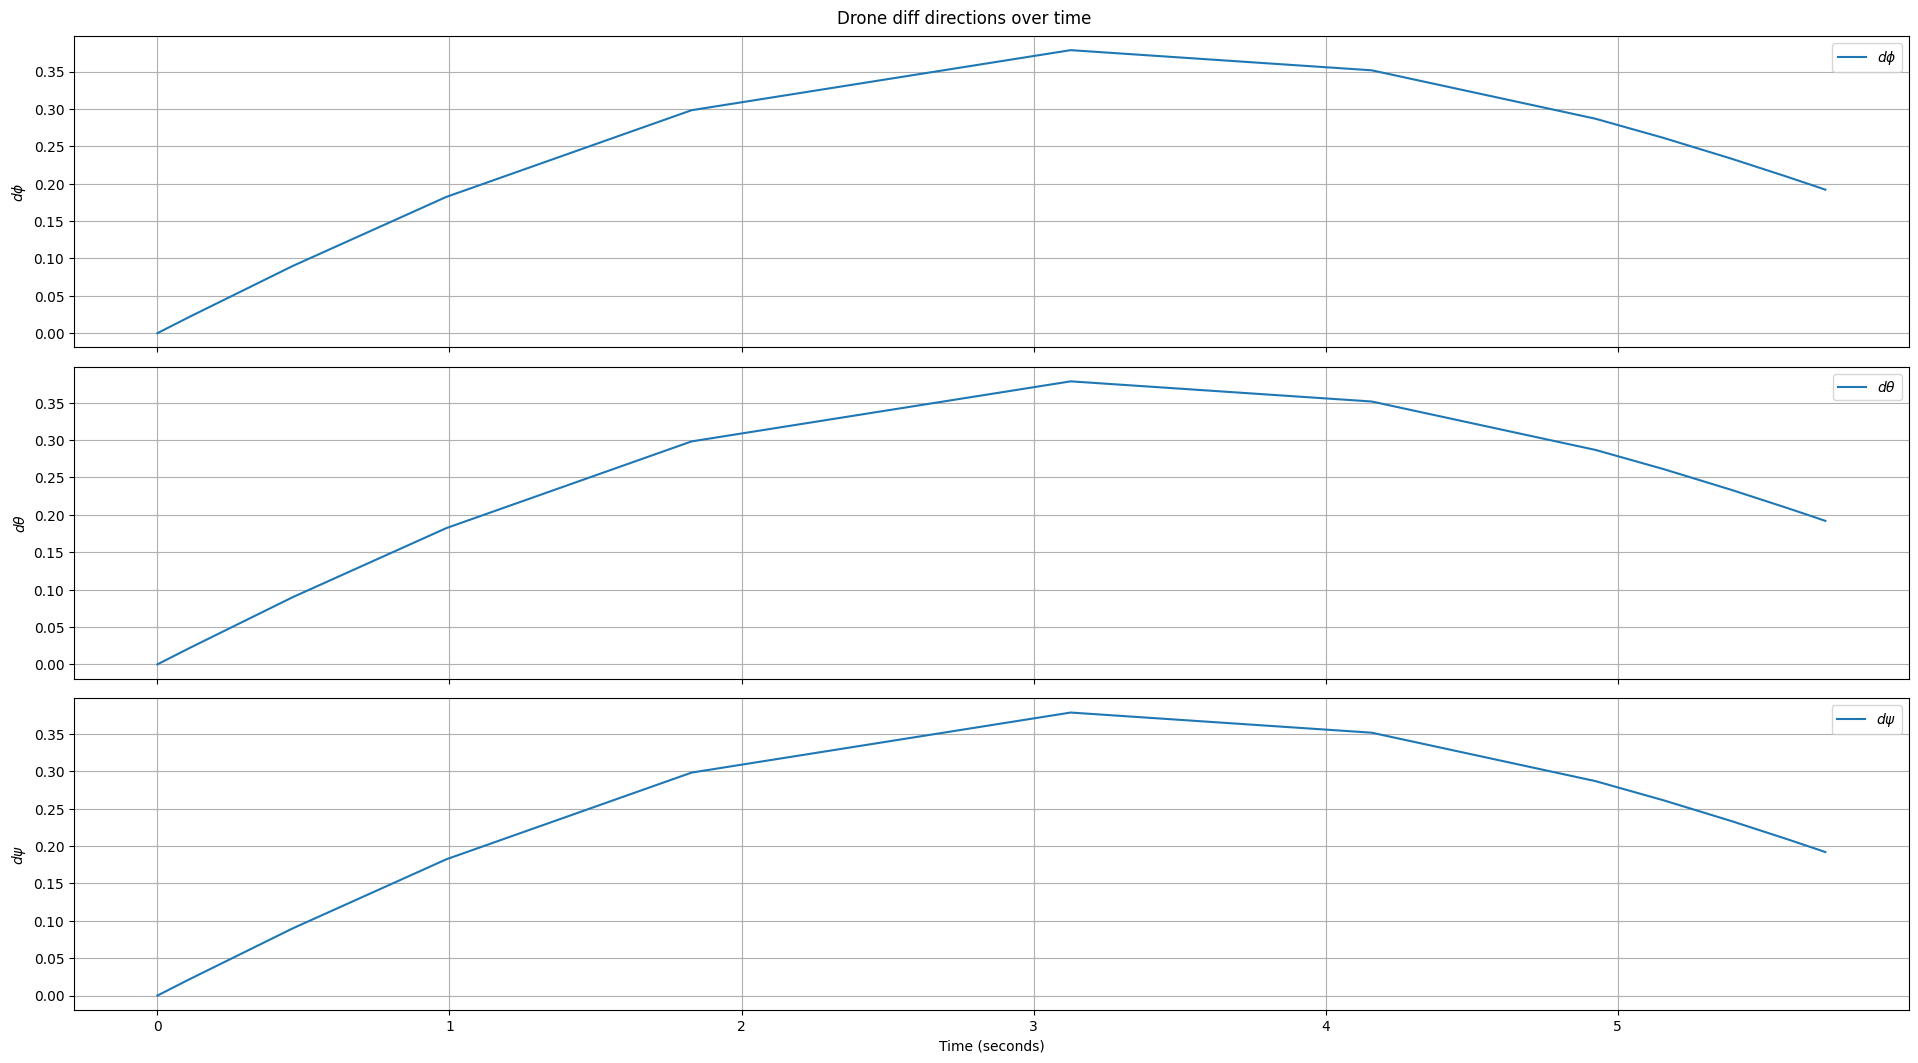

In [8]:
time_plot(['dphi', 'dtheta', 'dpsi'], sim_out, title='Drone diff directions over time',
    filename=os.path.join(output_dir, 'diff_directions_over_time.png'))

## Feedback Linearized Inputs

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot: ylabel='$f$'>, <AxesSubplot: ylabel='$m_x$'>,
        <AxesSubplot: ylabel='$m_y$'>,
        <AxesSubplot: xlabel='Time (seconds)', ylabel='$m_z$'>],
       dtype=object))

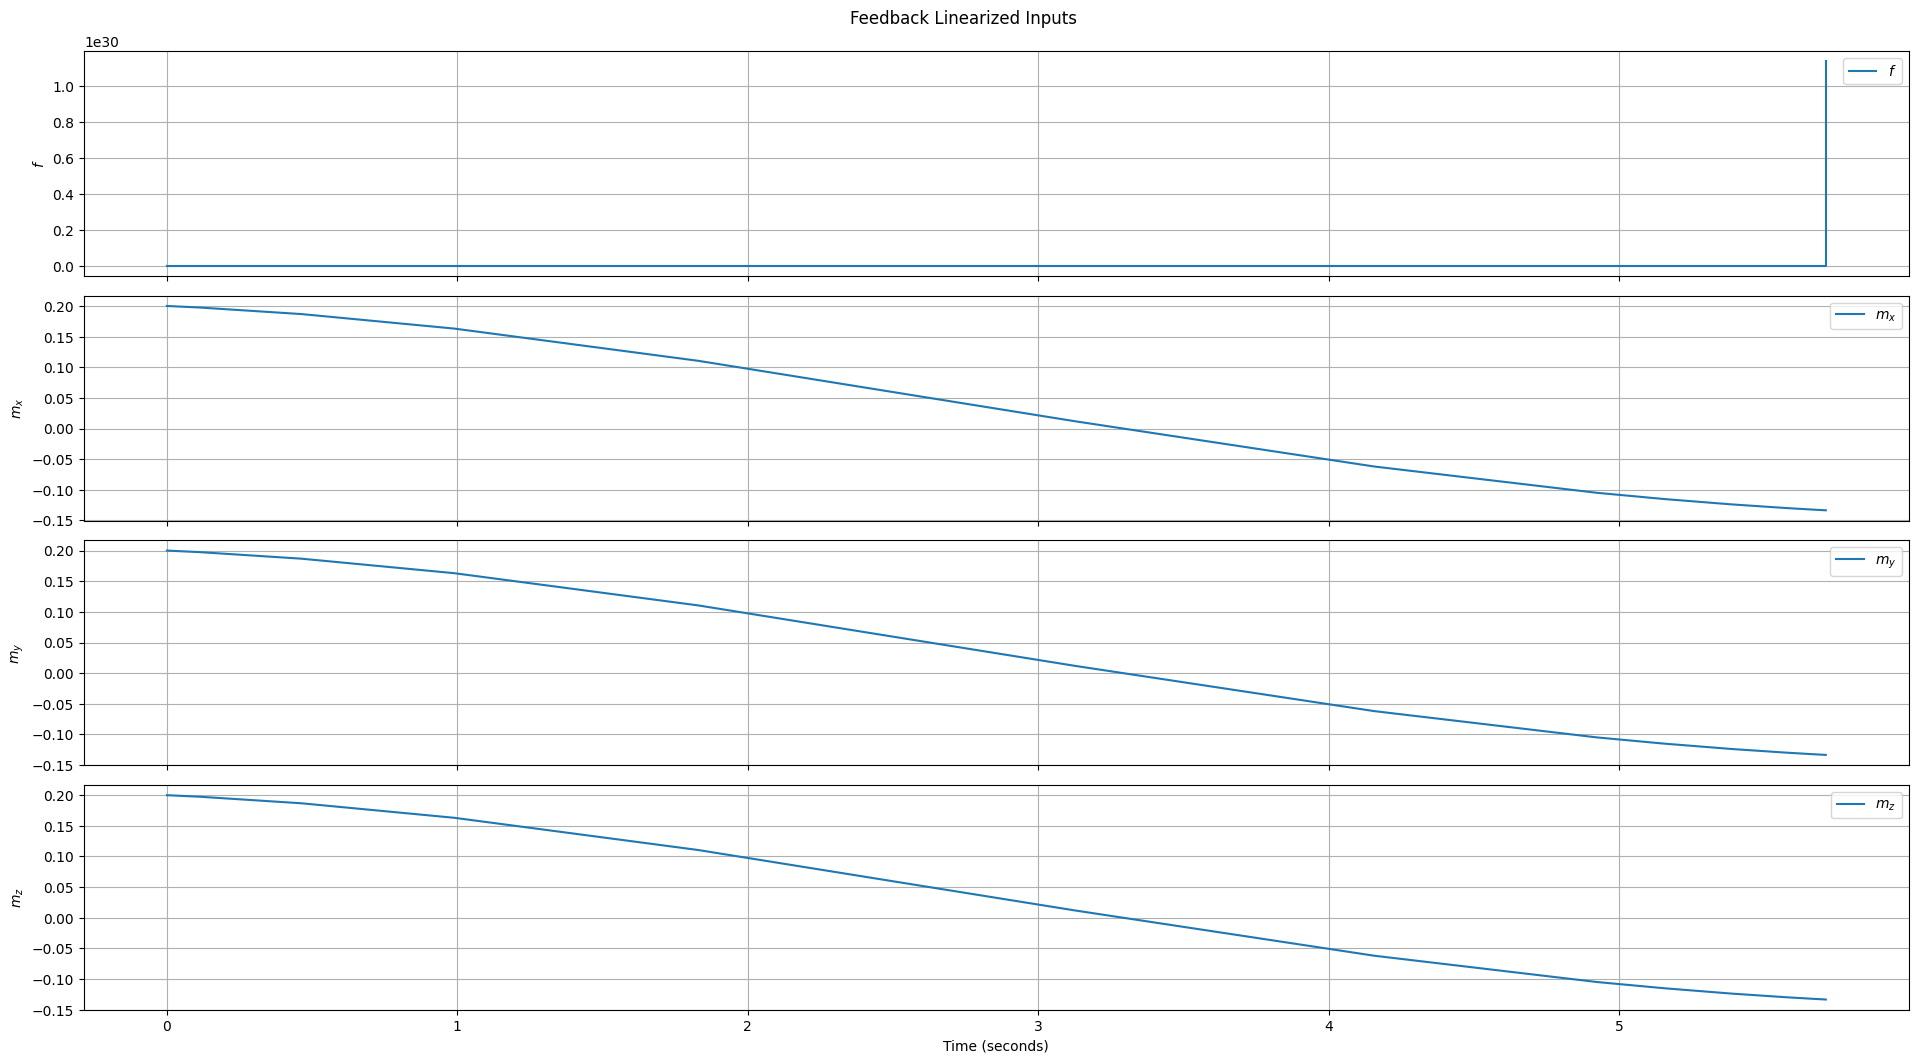

In [9]:
time_plot(['f', 'm_x', 'm_y', 'm_z'], sim_out, title='Feedback Linearized Inputs',
    filename=os.path.join(output_dir, 'linearized_inputs_over_time.png'))

## State space plots

(<Figure size 1920x1080 with 1 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

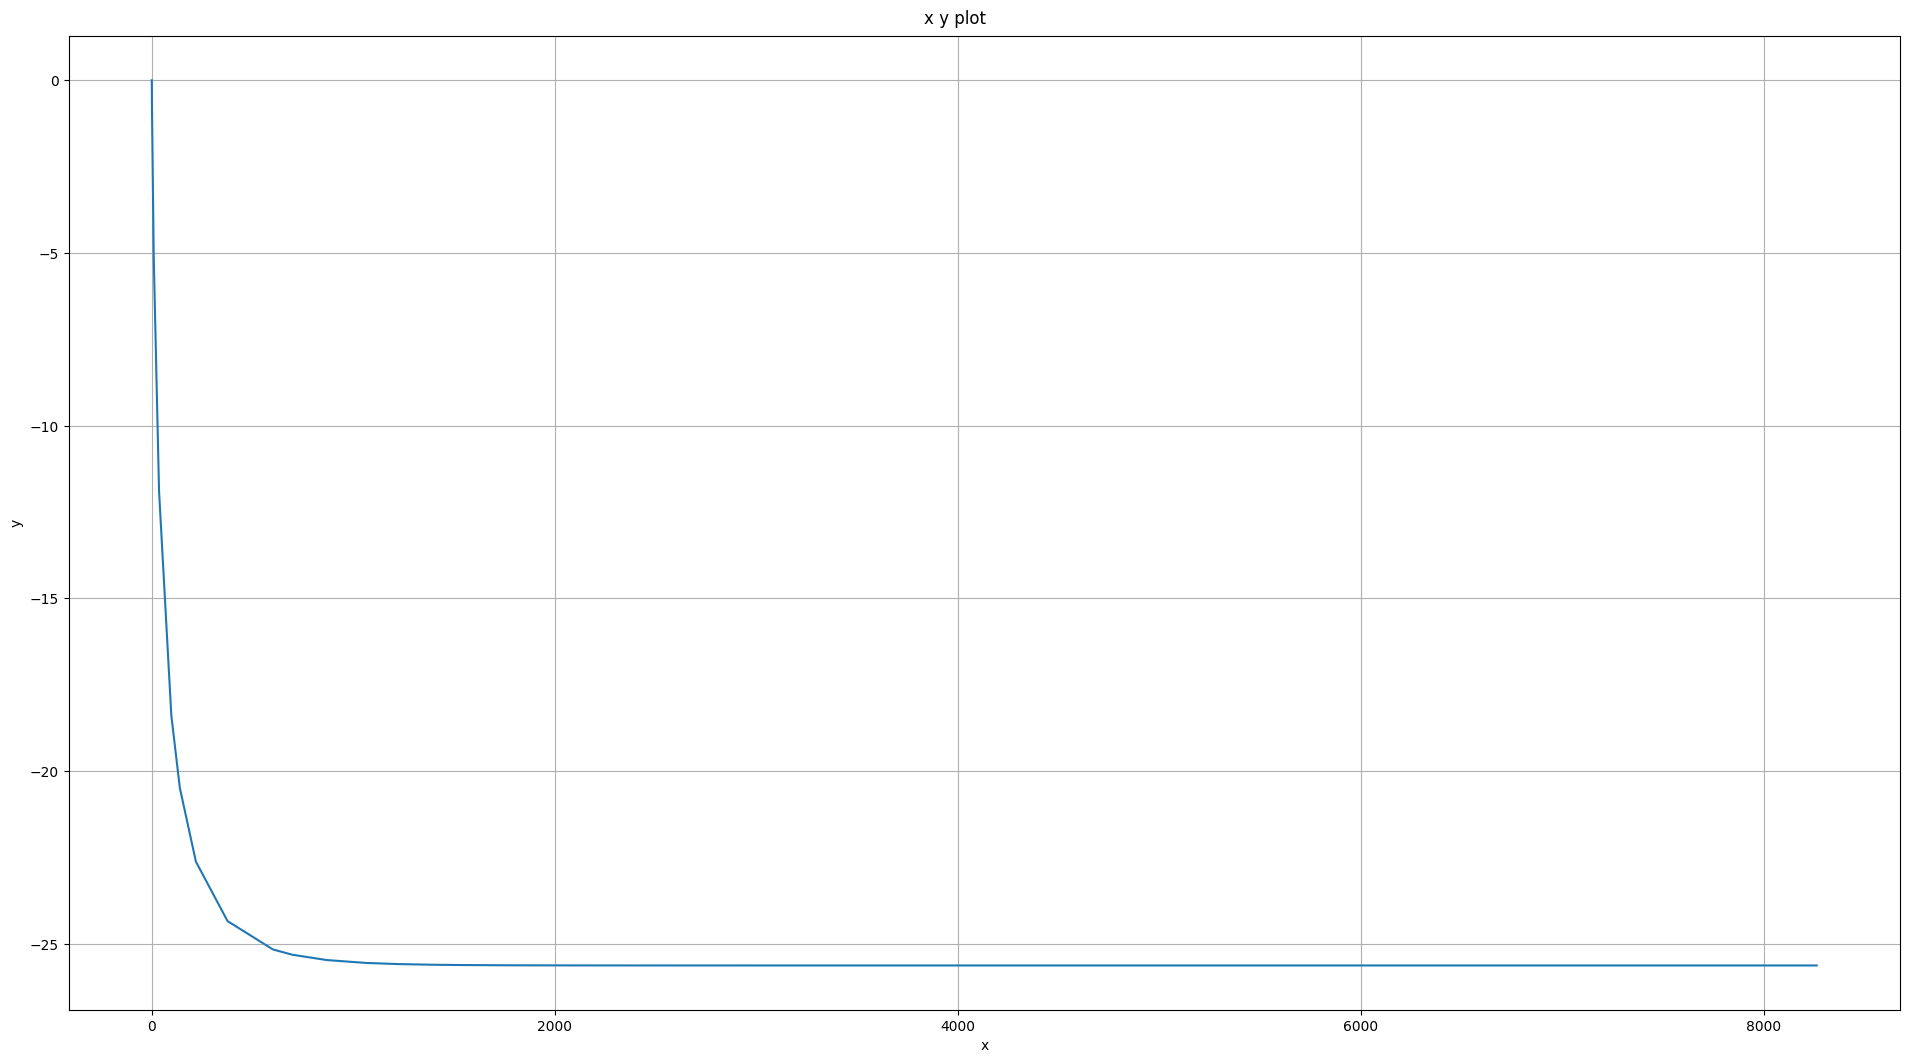

In [10]:
x='x'
y='y'
state_space_plot(x,y,sim_out, title=f'{x} {y} plot',
    filename=os.path.join(output_dir, f'{x}_{y}_plot.png'))